In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
plt.style.use('seaborn-dark')

In [2]:
aqi = pd.read_csv("/Users/alexdeich/Dropbox/coding_fun/airquality/westside_purple1.csv", error_bad_lines=False, warn_bad_lines=True)
wind = pd.read_csv("/Users/alexdeich/Dropbox/coding_fun/airquality/wind_data.csv")
windspeed = pd.read_csv("/Users/alexdeich/Dropbox/coding_fun/airquality/wind_speed.csv")
aqidates = [(dt.datetime.strptime(i, "%Y-%m-%d %H:%M:%S UTC") - dt.datetime(1970,1,1)).total_seconds() for i in aqi["created_at"]]
winddates = [(dt.datetime.strptime(i, "%Y-%m-%dT%H:%M:%SZ") - dt.datetime(1970,1,1)).total_seconds() for i in wind["time"]]

b'Skipping line 692: expected 10 fields, saw 11\nSkipping line 1412: expected 10 fields, saw 11\nSkipping line 2132: expected 10 fields, saw 11\n'


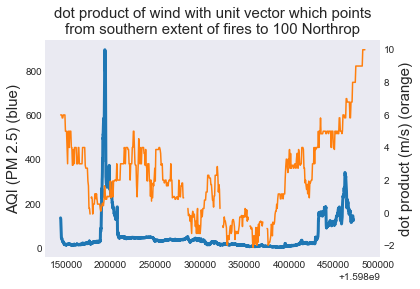

In [7]:
main_dir = 5.5
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.plot(winddates, dot(windspeed["wind_speed"], np.deg2rad(wind["wind_from_direction"]), main_dir), c='tab:orange', label='wind')
ax1.plot(aqidates, aqi["PM2.5_ATM_ug/m3"], linewidth = 3, label='AQI')
ax1.set_ylabel("AQI (PM 2.5) (blue)",size=15)
ax2.set_ylabel("dot product (m/s) (orange)",size=15)
plt.title("dot product of wind with unit vector which points\nfrom southern extent of fires to 100 Northrop", size=15)
plt.savefig("/Users/alexdeich/Dropbox/coding_fun/airquality/windaqi.png", dpi=300)

In [137]:

print(wind["time"].iloc[[-4]])
print(aqi["created_at"].iloc[[0]])

423    2020-08-26 22:40:00 UTC
Name: time, dtype: object
0    2020-08-23 00:48:10 UTC
Name: created_at, dtype: object


In [4]:
def dot(wind_speed, direction, main_dir):
    theta = (direction - main_dir)%(2*np.pi)
    return(wind_speed * np.cos(theta))

In [96]:
aqi.head(35)

,created_at,entry_id,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2020-08-23 00:48:10 UTC,667,106.00,203.63,220.54,3.0,-36.0,84.0,48.0,134.88
1,2020-08-23 00:50:14 UTC,668,103.72,198.09,216.88,5.0,-36.0,85.0,47.0,131.26
2,2020-08-23 00:52:10 UTC,669,103.67,194.00,208.06,7.0,-37.0,86.0,45.0,128.67
3,2020-08-23 01:02:16 UTC,670,33.86,63.53,65.53,1.0,-65.0,79.0,41.0,46.88
4,2020-08-23 01:04:16 UTC,671,31.76,57.98,60.82,3.0,-66.0,77.0,43.0,44.42
5,2020-08-23 01:06:16 UTC,672,29.86,53.89,56.89,5.0,-65.0,77.0,44.0,42.89
6,2020-08-23 01:08:16 UTC,673,28.13,48.93,51.24,7.0,-65.0,75.0,44.0,40.54
7,2020-08-23 01:10:16 UTC,674,28.95,53.20,55.67,9.0,-67.0,75.0,47.0,42.55
8,2020-08-23 01:12:16 UTC,675,27.60,52.62,55.45,11.0,-66.0,75.0,46.0,42.25
9,2020-08-23 01:14:17 UTC,676,27.46,51.32,54.45,13.0,-68.0,73.0,48.0,41.64


In [75]:
nonnanwind = wind.fillna(999)
nonnanwind.iloc[[33]]

,time,wind_from_direction
33,2020-08-24T05:20:00Z,999
